# t-SNE
- t distributed stochastic neighbor embedding
- unsupervised
- non linear dimensionality reduction technique 
- helps vizualize high dimensionality data
- non linear dimensionality means it helps separate data that cannot be separated by straight line. 
- this algorithm focuses on preserving pairwise similarity in lower dimensional spaces. 

## How a tSNE works:
- t-SNE models a point being selected as a neighbor of another point in both higher and lower dimensions. It starts by calculating a pairwise similarity between all data points in the high-dimensional space using a Gaussian kernel. The points that are far apart have a lower probability of being picked than the points that are close together. 
- Then, the algorithm tries to map higher dimensional data points onto lower dimensional space while preserving the pairwise similarities. 
- It is achieved by minimizing the divergence between the probability distribution of the original high-dimensional and lower-dimensional. The algorithm uses gradient descent to minimize the divergence. The lower-dimensional embedding is optimized to a stable state.

### Source : 
- https://www.datacamp.com/tutorial/introduction-t-sne
- Book : Approaching (Almost) Any Machine Learning Problem – Abhishek Thakur

In [1]:
# import statements
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
%matplotlib inline

In [2]:
# MNIST data available in sklearn datasets
data = datasets.fetch_openml(
'mnist_784',
version=1,
return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

C:\Users\pavan\anaconda3a\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# pixel_values is a 2-dimensional array of shape 70000x784. There are 70000 different images, each of size 28x28 pixels. 
# Flattening 28x28 gives 784 data points.
type(pixel_values)

pandas.core.frame.DataFrame

In [4]:
pixel_values.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
targets.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int32

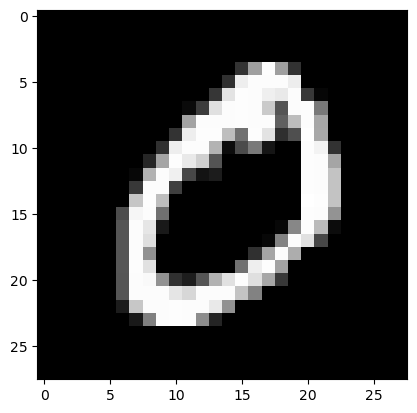

In [8]:
single_image = np.array(pixel_values.loc[1, :]).reshape(28, 28)
plt.imshow(single_image, cmap='gray')

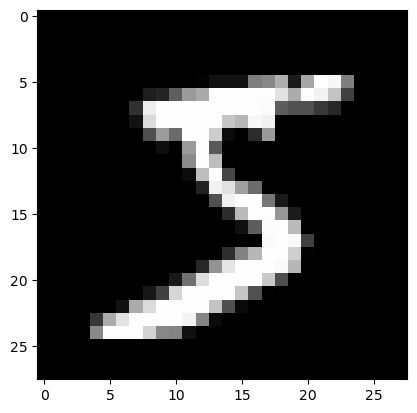

In [9]:
single_image = np.array(pixel_values.loc[0, :]).reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [11]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values.loc[:3000, :])

In [13]:
transformed_data

array([[ 19.457607 ,  -9.710902 ],
       [ 55.7951   ,  -1.0593646],
       [  1.1185118, -56.443848 ],
       ...,
       [-31.218554 ,  44.164528 ],
       [ 10.36554  , -21.702175 ],
       [-13.354572 , -56.663452 ]], dtype=float32)

In [14]:
transformed_data.shape

(3001, 2)

In [16]:
tsne_df = pd.DataFrame(
np.column_stack((transformed_data, targets.loc[:3000])),
columns=["x", "y", "targets"]
)
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

C:\Users\pavan\AppData\Local\Temp\ipykernel_17752\2725886989.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)


In [17]:
tsne_df.head()

,x,y,targets
0,19.457607,-9.710902,5
1,55.795101,-1.059365,0
2,1.118512,-56.443848,4
3,-42.550388,10.279291,1
4,-9.347184,-34.330112,9


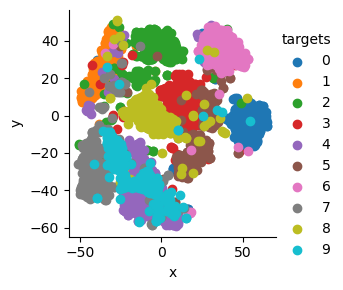

In [19]:
grid = sns.FacetGrid(tsne_df, hue="targets")
grid.map(plt.scatter, "x", "y").add_legend()

# Remarks
- The above plot shows that in the lower dimension 0 is closer to 5,6 while 4 is closer to 9. 1 is closer to 7 because of looking similar. 